# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

Let's work on some random generated data first

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

Let's plot and see our data

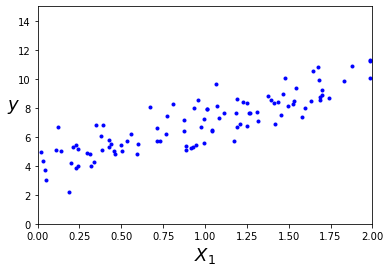

In [13]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression

### Linear Regression using Normal Equation

In [39]:
X_b = np.c_[np.ones((100, 1)), X]  # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.99737249],
       [3.07567058]])

In [40]:
X_new = np.array(([0], [2]))
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add X0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99737249],
       [10.14871365]])

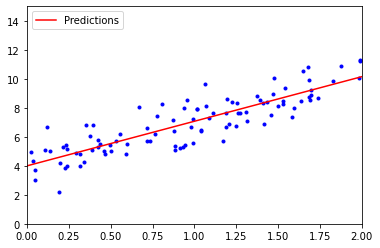

In [43]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.legend(loc='upper left')
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regression Using Scikit-Learn

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficient: {lin_reg.coef_}')

Intercept: [3.99737249]
Coefficient: [[3.07567058]]


Predciting and plotting the result:

In [33]:
lin_reg_pred = lin_reg.predict(X)

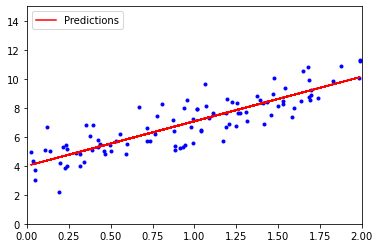

In [37]:
plt.plot(X, y, 'b.')
plt.plot(X, lin_reg_pred, 'r-', label='Predictions')
plt.legend(loc='upper left')
plt.axis([0, 2, 0, 15])
plt.show()

### Stochastic Gradient Descent using Scikit-Learn
By default, optimizes towards the squared error cost function

The following code:
- runs maximum for 1000 epochs or until the loss drops by less than 0.001 during each epoch, `max_iter`=1000, `tol`=1e-3
- starts with learning rate of 0.1, using default learning schedule, `eta0`=0.1
- doesn't use any regularization, `penalty`=None

In [50]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [51]:
print(f'Intercept: {sgd_reg.intercept_}')
print(f'Coefficient: {sgd_reg.coef_}')

Intercept: [3.99365122]
Coefficient: [3.11139432]


# Polynomial Regression

Initializing the data

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Plotting the data

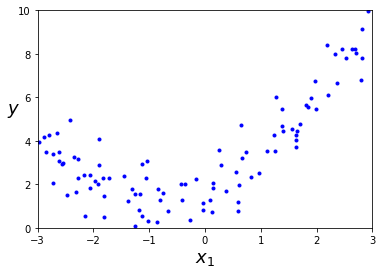

In [56]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

### Using Linear Regression from Scikit-Learn

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficient: {lin_reg.coef_}')

Intercept: [1.78134581]
Coefficient: [[0.93366893 0.56456263]]


Predicting and plotting the result:

In [67]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # get all the x values so that we can get predictions for it
X_new_poly = poly_features.transform(X_new)
lin_reg_predict = lin_reg.predict(X_new_poly)

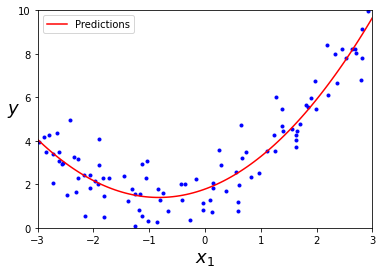

In [69]:
plt.plot(X, y, 'b.')
plt.plot(X_new, lin_reg_predict, 'r-', label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.show()

Let's look at the prediction results for different polynomial degrees

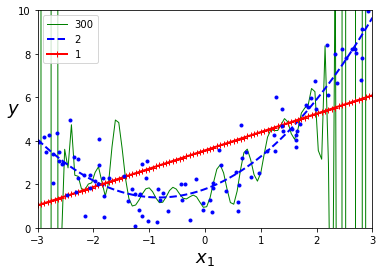

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

As we can see:
- Model with '300' degree is clearly overfitting the data
- Model with '1' degree is similar to a linear regression

Let's look at the learning curves in order to understand how our model is performing on Train vs Test data

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learnign_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth=2, label='test')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

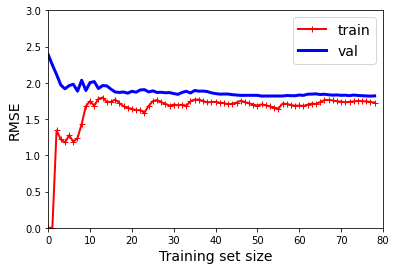

In [88]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()       

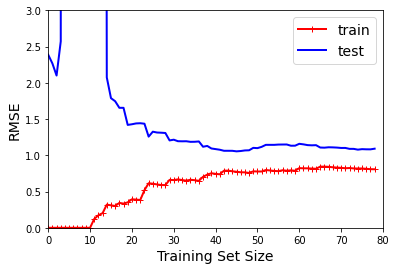

In [89]:
polynomial_regression = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learnign_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

## Regularization
- Ridge Regression
- Lasso Regression
- Elastic Net Regression

### Ridge Regression

In [101]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [103]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81978491])

### Lasso Regression

In [104]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [105]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.8197765])

### Elastic Net

In [106]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_reg.fit(X, y)
elastic_reg.predict([[1.5]])

array([4.78114505])

In [107]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81978365])

## Early Stopping

In [110]:
from sklearn.base import clone

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

poly_scaler = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scalar', StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.fit_transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate='constant', eta0=0.0005, random_state=42)

minimum_test_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # warm_start=True, hence continues where it left off
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    test_error = mean_squared_error(y_test, y_test_predict)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


In [111]:
best_epoch

51

In [112]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)